In [1]:
#import the necessary libraries
from statistics import mean
import numpy as np

#libraries for plotting
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
#assuming some example variables
#xs = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
#ys = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)

In [13]:
#Creating a dataset with random values
import random

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

In [16]:
#y = mx + b -> slope of the line
#m = ((mean(x)*mean(y)) - mean(x*y)) / ((mean(x))^2 - mean(x^2))
#b = mean(y) - (m* mean(x))
#This function takes (x, y) calculates the m, b and returns them
def best_fit_line_and_intercept(xs, ys):
    m = ( ((mean(xs)* mean(ys)) - mean(xs*ys)) /
        ((mean(xs) * mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - (m * mean(xs))
    
    return m, b

xs, ys = create_dataset(40,10,2,correlation='neg')

m, b = best_fit_line_and_intercept(xs, ys)

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)** 2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regression  = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 -  (squared_error_regression /squared_error_y_mean)



#regression_line is the calculated y value for the given x
regression_line = [(m*x + b) for x in xs]


#Next we can predict y value when x is given
predict_x = 8
predict_y = (m * predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.9516460906443589


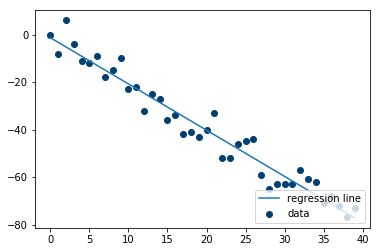

In [18]:
plt.scatter(xs, ys, color='#003F72', label = 'data')
#plt.scatter(predict_x, predict_y, color = 'g')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc = 4)
plt.show()